# Demonstrate the Functionality of Altair using Clerke's Rosetta Stone Arab-D Petrophysical Dataset


### 1) Load Python requirements:

In [ ]:
from pandas import DataFrame, read_csv

import altair as alt
#alt.renderers.enable('altair_viewer')

import pandas as pd
import numpy as np
import altair_transform

#read the file
file = r'Pc_Results.xlsx'
df = pd.read_excel(file,index_col=False)


### 2) Data:

Clerke's Rosetta Stone Arab-D carbonate data(1) is shown below in the display of our pandas DataFrame. This is Core analysis data. 

Clerke masterfully selected this dataset starting from 1,000's of qualified, inspected core plug samples where the final 450 samples were randomly selected from this total group to create a very unique dataset in that covers the full range in poro-perm space and Petrophysical Rock Types (PRTs) in the Arab D. 

High Pressure Mercury Injection (HPMI) was performed on each of the core plug samples too. The HPMI data was fit to the Thomeer hyperbolas for each pore system present in the sample giving us the Thomeer parameters Pd, G and Bulk Volume Occupied for each pore system.



1) Clerke, E. A., Mueller III, H. W., Phillips, E. C., Eyvazzadeh, R. Y., Jones, D. H., Ramamoorthy, R., Srivastava, A., (2008) “Application of Thomeer Hyperbolas to decode the pore systems, facies and reservoir properties of the Upper Jurassic Arab D Limestone, Ghawar field, Saudi Arabia: A Rosetta Stone approach”, GeoArabia, Vol. 13, No. 4, p. 113-160, October, 2008. 

In [ ]:
df.head(20)

### 3) Thomeer Parameters and Petrophysical Rock Types:

A Thomeer hyperbola is fit to the HPMI data by optimizing on the Thomeer Parameters G1, Pd1 and BV1 for the first pore system and G2, Pd2 and BV2 for the second. The following image relates the Thomeer hyperbola (dashed black line) to the Capillary Pressure Curve (solid black line). Ed Clerke used hist famous Thomeer Parameter spreadsheet with solver to optimize on the correct set of Thomeer parameters for each sample.  

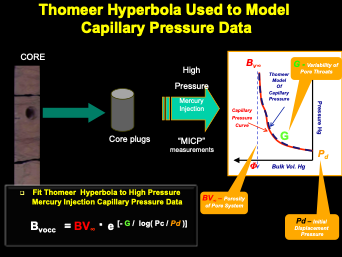

After all the Thomeer parameters were assigned to all the samples, then Dr. Clerke used the distributions of the  Initial Displacement Pressure (Pd) to devise his Petrophysical Rock Types (PRT) scheme. 

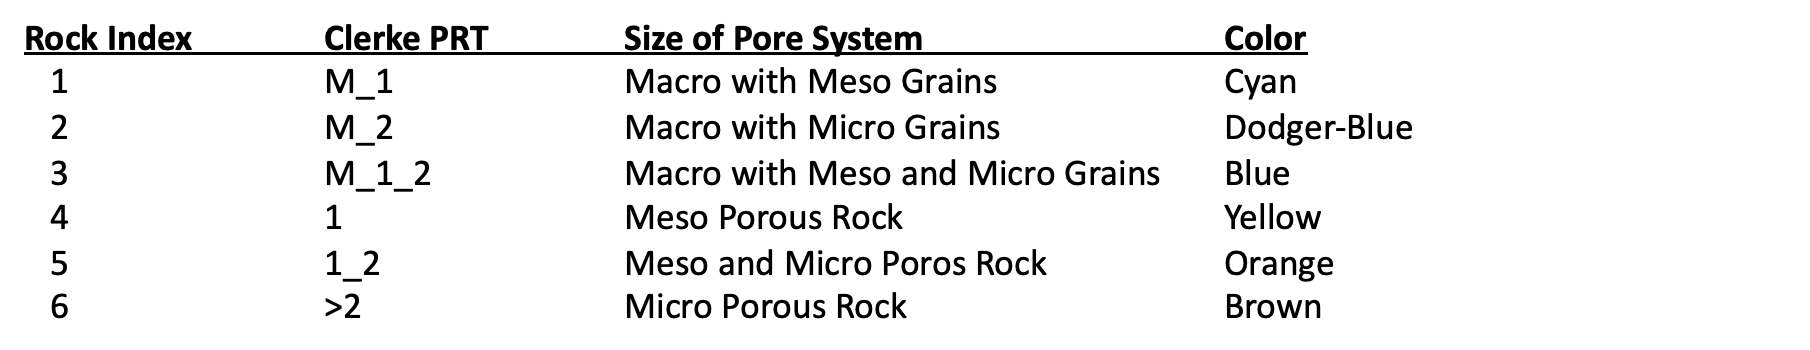


The following are some example results using Altair where the data in cross plots can be selected and then the appropriate data for those selected samples are shown in the bar charts below the cross plots. 

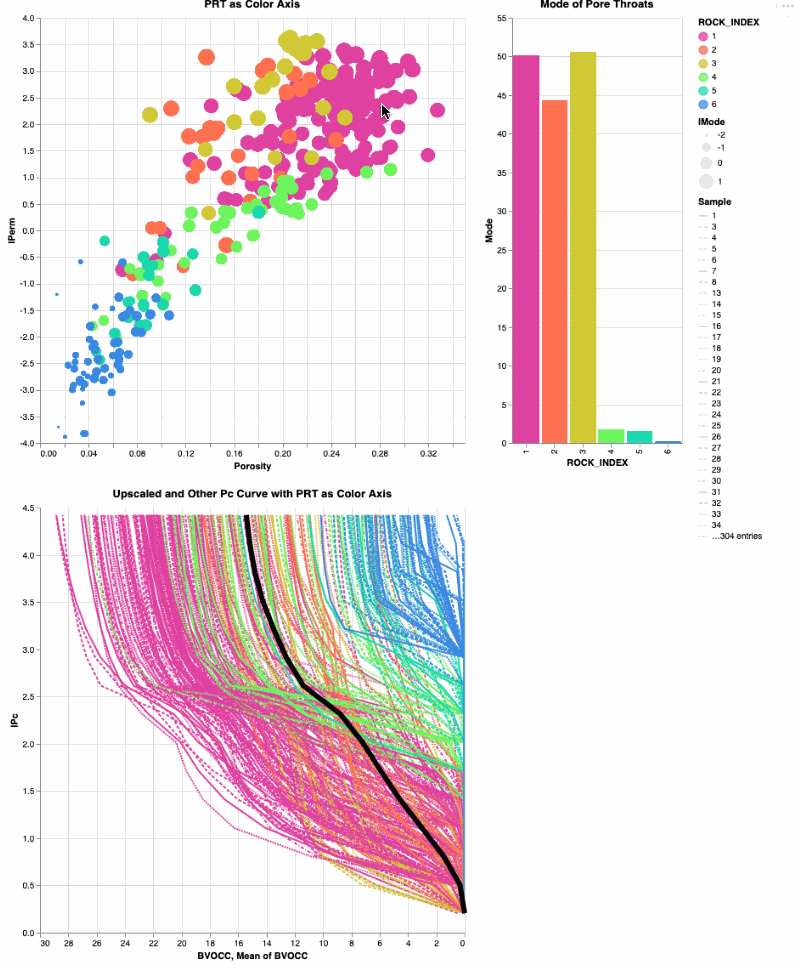


### 4) Exact Mode of Pore Throat Distribution using Thomeer Parameters from Buiting Mode Equation:
In Clerke's Arab D Rosetta Stone data, most of the macro-porous rock typically has a dual porosity system.  The Pore Throat Distribution (PTD) will have two modes as shown below. 

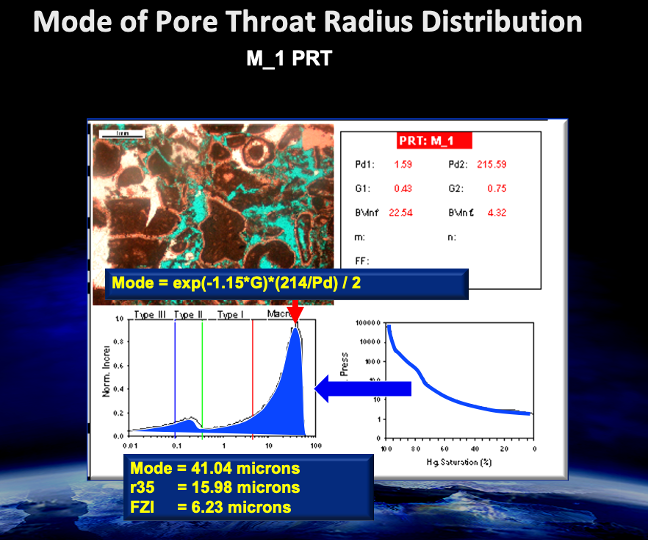

The macro portion of the rock will have a mode greater than 2 microns with a second (or third) mode less than 2 microns. Probably the most abundant PRT is the M_1. This is a macro-porous rock with a mode in the macro portion of the PTD and a second mode in the meso-porosity range. In this PRT both the macro pores and meso-porous grains can contain oil saturations once the capillary pressure is great enough to drive out the water. The M_2 PRT is also a macro-porous rock, but the second pore system is micro-porous and too tight to have hydrocarbon saturations. 

One of the benefits of working with Thomeer parameters is that the exact mode of the PTD (radius) can be calculated for each sample using the Buiting Mode equation as shown below:

    Mode(microns) = (exp(-1.15 * G) * (214/Pd))/2

Again, this equation gives us the mode of the pore system in microns, and we normally only calculate the mode for the largest pore system in the sample. In another of our GitHub repositories we use this mode as the ground truth as to the most dominant pore throat and compare this to the calculated Winland r35 and Amaefule FZI and RQI. Winland's r35 and Amaefule RQI compare the most favorably in this data set. FZI or the mean hydraulic radius usually lies between the true modes in a bi-modal pore system rock from this dataset. 

## 5) Altair Interactivity starts with the Porosity vs. Permeability Cross Plot:
### Porosity vs. Permeability Cross Plots showing PRT and Mode of PTD:
The following code is used to display the Porosity vs. Permeability Cross Plots for our data. The first Cross Plot on the left shows Clerke's PRTs on the z color axis. The Cross Plot on the right shows the mode of the Pore Throat Distribution (PTD) on the z color axis. We also show a bar chart of the log10 of the Mode of the PTD for each PRT. 

In [ ]:
interval = alt.selection_interval()

base = alt.Chart(df).properties(
    width=300,
    height=375, 
).add_selection(interval)


prt = base.mark_point(filled=True, size=200).encode(
    x='Porosity:Q',
    y='lPerm:Q',
    size='lMode:Q',
    color=alt.condition(interval, 'ROCK_INDEX:O', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow')),
    #color=alt.condition(selector, 'Well_Name:O', alt.value('lightgray'), legend=None),
    tooltip='Mode:Q', 
).properties(
    title='Clerke Labeled PRT as Color Axis',
    selection=interval
)


pointsMode = base.mark_point(filled=True, size=200).encode(
    x='Porosity:Q',
    y='lPerm:Q',
    size='lMode:Q',
    color=alt.condition(interval, 'lMode:Q', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow')),
    #color=alt.condition(selector, 'Well_Name:O', alt.value('lightgray'), legend=None),
    tooltip='Mode:Q', 
).properties(
    title='Actual Mode of PTD shown as Color Axis',
    selection=interval
)

hist1 = alt.Chart(df).mark_bar().encode(
    #x='count()',
    x='lMode',
    y='ROCK_INDEX:O',
    color=alt.condition(interval, 'ROCK_INDEX:O', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'))
).properties(
    width=750,
    height=80
).transform_filter(
    interval
)


thomeer = prt | pointsMode


thomeer & hist1



## Start from the Porosity-Permebility Cross Plot with Petrophysical Rock Types (PRT) on z color axis as defined by Clerke:
Test the inteactive aspects of Altair by selecting data points from the cross plot and observe the Capillary Pressure curves associated with the selected samples. 

#### This Altair Dashboard also Creates an Upscaled Pc curve from the selected samples


In [ ]:
#interval = alt.selection_interval()
#vega.scheme('basic', ['#f00', '#0f0', '#00f', '#ff0', '#f0f', '#0ff']);
interval = alt.selection_interval()


kphi = alt.Chart(df).mark_point(filled=True, size=200).encode(
    x='Porosity:Q',
    y='lPerm:Q',
    size='lMode:Q',
    color=alt.condition(interval, 'ROCK_INDEX:O', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow')),
    #color=alt.condition(selector, 'Well_Name:O', alt.value('lightgray'), legend=None),
    tooltip='Mode:Q', 
).properties(
    width=500,
    height=500, 

    title='PRT as Color Axis',
    selection=interval
)

pc = alt.Chart(df).mark_line(clip=True).encode(
    alt.X('BVOCC:Q',
        scale=alt.Scale(domain=(30, 0))
    ),    
    y='lPc:Q',
    #size='lMode:Q',
    #color='Sample:N',
    color=alt.condition(interval, 'ROCK_INDEX:O', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow')),
    tooltip='Mode:Q', 
    strokeDash='Sample:N',
).properties(
    title='Upscaled and Other Pc Curve with PRT as Color Axis',
    width=500,
    height=500, 
    
).transform_filter(
    interval
)

pc2 = alt.Chart(df).mark_line(strokeWidth=6).encode(
    alt.X('BVOCC:Q', aggregate='mean',
          scale=alt.Scale(domain=(30, 0))
         ),
    alt.Y('lPc:Q'),
    color=alt.value('black'),
    #color=alt.condition(interval, 'ROCK_INDEX:O', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow')), 
).properties(
    title='Upscaled Pc Curve with PRT as Color Axis',
    width=500,
    height=500, 
    
).transform_filter(
    interval
)
    
ptd = base.mark_line( clip=True).encode(
    alt.X('lMicrons:Q',
        scale=alt.Scale(domain=(-2., 2.5))
    ),    
    alt.Y('dBv:Q',
        scale=alt.Scale(domain=(0, 15))
    ),    
    #size='lMode:Q',
    color=alt.condition(interval, 'ROCK_INDEX:O', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow')),
    #color=alt.condition(selector, 'Well_Name:O', alt.value('lightgray'), legend=None),
    #tooltip='Mode:Q', 
    strokeDash='Sample:N',
).properties(
    title='Pore Throat Distribution',
    width=300,
    height=200,
).transform_filter(
    interval
)



hist2 = alt.Chart(df).mark_bar().encode(
    x='ROCK_INDEX:O',
    y='Mode:Q',
    color=alt.condition(interval, 'ROCK_INDEX:O', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'))
).properties(
    title='Mode of Pore Throats',
    width=300,
    height=500,
    #selection=interval
).transform_filter(
    interval
)

kphihist = kphi | hist2
pchist = pc + pc2 | ptd 


kphihist & pchist 


### Use mark_point for Pc curves

In [ ]:
interval = alt.selection_interval()


kphi = alt.Chart(df).mark_point(filled=True, size=200).encode(
    x='Porosity:Q',
    y='lPerm:Q',
    size='lMode:Q',
    color=alt.condition(interval, 'ROCK_INDEX:O', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow')),
    #color=alt.condition(selector, 'Well_Name:O', alt.value('lightgray'), legend=None),
    tooltip='Mode:Q', 
).properties(
    width=500,
    height=500, 

    title='PRT as Color Axis',
    selection=interval
)

pc = alt.Chart(df).mark_point(filled=True, size=120,clip=True).encode(
    alt.X('BVOCC:Q',
        scale=alt.Scale(domain=(30, 0))
    ),    
    y='lPc:Q',
    #size='lMode:Q',
    color=alt.condition(interval, 'ROCK_INDEX:O', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow')),
    #color=alt.condition(selector, 'Well_Name:O', alt.value('lightgray'), legend=None),
    tooltip='Mode:Q', 
    #strokeDash='Sample',
).properties(
    title='Upscaled Pc Curve with all Selected Pc Curves. PRT as Color Axis.',
    width=500,
    height=500, 
    
).transform_filter(
    interval
)


pc2 = alt.Chart(df).mark_line(strokeWidth=5).encode(
    alt.X('BVOCC:Q', aggregate='mean',
          scale=alt.Scale(domain=(30, 0))
         ),
    alt.Y('lPc:Q'),
    color=alt.value('red'),
    #color=alt.condition(interval, 'ROCK_INDEX:O', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow')), 
).properties(
    title='Upscaled Pc Curve with PRT as Color Axis',
    width=500,
    height=500, 
    
).transform_filter(
    interval
)
    

hist2 = alt.Chart(df).mark_bar().encode(
    x='ROCK_INDEX:O',
    y='Mode:Q',
    color=alt.condition(interval, 'ROCK_INDEX:O', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'))
).properties(
    title='Mode of Pore Throats',
    width=200,
    height=500,
    #selection=interval
).transform_filter(
    interval
)

kphihist = kphi | hist2
pchist = pc + pc2


kphihist & pchist


### More Example Plots with Interactivity:

In [ ]:

interval = alt.selection_interval()

base = alt.Chart(df).properties(
    width=500,
    height=500, 
).add_selection(interval)



kphi = base.mark_point(filled=True, size=200).encode(
    x='Porosity:Q',
    y='lPerm:Q',
    size='lMode:Q',
    color=alt.condition(interval, 'ROCK_INDEX:O', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow')),
    #color=alt.condition(selector, 'Well_Name:O', alt.value('lightgray'), legend=None),
    tooltip='Mode:Q', 
).properties(
    title='PRT as Color Axis',
    selection=interval
)



pc = base.mark_point( filled = True, size=200, clip=True ).encode(
    alt.X('lBVOCC:Q',
        scale=alt.Scale(domain=(2, -2.5))
    ),    
    y='lPc:Q',
    #size='lMode:Q',
    color=alt.condition(interval, 'ROCK_INDEX:O', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow')),
    #color=alt.condition(selector, 'Well_Name:O', alt.value('lightgray'), legend=None),
    #strokeDash='Sample',
    tooltip='Mode:Q', 
).properties(
    title='Pc Curve with PRT as Color Axis',
    width=500,
    height=500, 
    
).transform_filter(
    interval
)

box = alt.Chart(df).mark_boxplot(extent='min-max').encode(
    x='ROCK_INDEX:O',
    y='lMode:Q',
    color=alt.condition(interval, 'ROCK_INDEX:O', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow')),
).properties(
    title='Box Plot by PRT ',
    width=200,
    height=500, 
    
).transform_filter(
    interval
)



#ptd = base.mark_line(filled = True, size=200, clip=True).encode(
ptd = base.mark_line( clip=True).encode(
    alt.X('lMicrons:Q',
        scale=alt.Scale(domain=(-2, 2.5))
    ),    
    alt.Y('dBv:Q',
        scale=alt.Scale(domain=(0, 15))
    ),    
    #size='lMode:Q',
    color=alt.condition(interval, 'ROCK_INDEX:O', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow')),
    #color=alt.condition(selector, 'Well_Name:O', alt.value('lightgray'), legend=None),
    #tooltip='Mode:Q', 
    strokeDash='Sample:N',
).properties(
    title='PRT as Color Axis',
    width=500,
    height=300,
).transform_filter(
    interval
)



hist2 = alt.Chart(df).mark_bar().encode(
    x='ROCK_INDEX:O',
    y='lMode:Q',
    color=alt.condition(interval, 'ROCK_INDEX:O', alt.value('lightgray'),scale=alt.Scale(scheme='rainbow'))
).properties(
    title='Mode of Pore Throats',
    width=200,
    height=300,
    #selection=interval
).transform_filter(
    interval
)


kphibox = kphi | box

ptdhist = ptd | hist2


kphibox & ptdhist